<a href="https://colab.research.google.com/github/2303A51786/nlp/blob/main/NLP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pandas numpy nltk scikit-learn matplotlib wordcloud


import pandas as pd
import numpy as np
import nltk
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
# Load the CSV file
df = pd.read_csv("english_news_dataset.csv")

# Show dataset info
print(df.head())
print("\nShape of dataset:", df.shape)


                                            Headline  \
0  Congress leader Baljinder Singh shot dead at h...   
1  17-year-old girl preparing for NEET dies by su...   
2  Hampers to welcome MPs in new Parliament tomor...   
3  Only 10% women lawmakers in RS, while only 14%...   
4  Ganesh temple decorated with notes, coins wort...   

                                             Content News Categories  \
0  Congress leader Baljinder Singh was shot dead ...    ['national']   
1  Another NEET aspirant died by suicide in Rajas...    ['national']   
2  In order to mark the first-ever working day of...    ['national']   
3  Congress President Mallikarjun Kharge, while s...    ['national']   
4  The Sri Sathya Ganapathi Temple in Bengaluru a...    ['national']   

         Date  
0  19-09-2023  
1  19-09-2023  
2  19-09-2023  
3  19-09-2023  
4  19-09-2023  

Shape of dataset: (199706, 4)


In [6]:
# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Text cleaning function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    tokens = nltk.word_tokenize(text)  # tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

# Apply preprocessing
df['clean_text'] = df['Content'].astype(str).apply(clean_text)

print(df[['Content', 'clean_text']].head())

                                             Content  \
0  Congress leader Baljinder Singh was shot dead ...   
1  Another NEET aspirant died by suicide in Rajas...   
2  In order to mark the first-ever working day of...   
3  Congress President Mallikarjun Kharge, while s...   
4  The Sri Sathya Ganapathi Temple in Bengaluru a...   

                                          clean_text  
0  congress leader baljinder singh shot dead hous...  
1  another neet aspirant died suicide rajasthans ...  
2  order mark firstever working day new parliamen...  
3  congress president mallikarjun kharge speaking...  
4  sri sathya ganapathi temple bengaluru adorned ...  


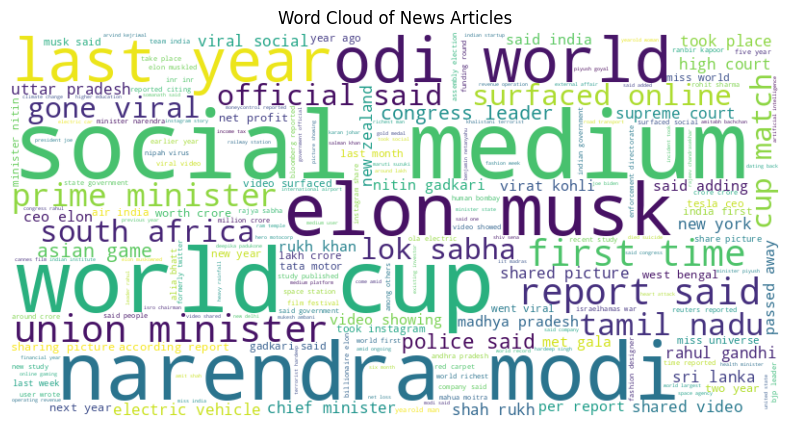

In [7]:
# Combine all text
all_words = " ".join(df['clean_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of News Articles")
plt.show()


In [ ]:
# Convert text to document-term matrix
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display top words in each topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    top_words = [words[j] for j in topic.argsort()[-10:]]
    print(f"Topic {i+1}: {', '.join(top_words)}")
